# 과제: MNIST 데이터를 나만의 NN model로 95 % 이상의 성능으로 training 시켜보자!


## Loading MNIST training data

출처: 18기 DS 김승하님

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np

# import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scaling(image data는 min-max scaling 주로 사용)
x_train = x_train/255.0
x_test = x_test/255.0

## Training Data
28 * 28 pixel 값을 가진 총 60000개의 이미지 데이터

In [2]:
x_train.shape 

(60000, 28, 28)

Neural network 모델에 맞게 이미지 데이터를 벡터 형태로 데이터를 reshape 합니다.  
(Model을 만들 때 *keras.layers.Flatten(input_shape=(28, 28)) 이용해도 됨)

In [3]:
x_train, x_test = x_train.reshape((-1, 28*28)), x_test.reshape((-1, 28*28))
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

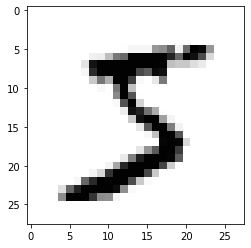

In [4]:
# Hint: x_train[0].reshape()
plt.imshow(x_train[0].reshape(28,28)).set_cmap('Greys')

## Training Labels
이미지 데이터가 나타내는 숫자값을 label로 가지고 있고, 0부터 9까지의 값을 나타냄  
마찬가지로, 60000개의 label이 존재

In [5]:
y_train.shape

(60000,)

In [6]:
# show MNIST label for above data
y_train[0]

5

# parameters for model

### Activation function

In [7]:
activation_list = ["sigmoid", "relu", "softmax", "tanh"]

### Loss function

In [8]:
loss_list = ["sparse_categorical_crossentropy",
             "categorical_crossentropy", 
             "binary_crossentropy"]

### Optimizer

In [9]:
optimizer_list = ["sgd", "adam", "rmsprop", "adagrad"]

### Innitialization

In [10]:
initializer_list = [tf.keras.initializers.RandomNormal(), 
                    tf.keras.initializers.RandomUniform(), 
                    tf.keras.initializers.he_normal(), 
                    tf.keras.initializers.he_uniform(), 
                    tf.keras.initializers.GlorotUniform(),
                    tf.keras.initializers.GlorotNormal()]

# model trials

In [11]:
# regularizer
regularizer = tf.keras.regularizers.l1(1e-3)
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          activity_regularizer=regularizer)
])

# weight initialization
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, input_dim=784, activation="sigmoid",
                          kernel_initializer=initializer_list[0])
])

In [12]:
#From Scratch
oh_y_train = [[0]*10  for i in range(len(y_train))]
for idx, oh_vec in enumerate(oh_y_train):
  oh_vec[y_train[idx]] = 1
oh_y_test = [[0]*10  for i in range(len(y_test))]
for idx, oh_vec in enumerate(oh_y_test):
  oh_vec[y_test[idx]] = 1
oh_y_train = np.array(oh_y_train)
oh_y_test = np.array(oh_y_test)

#Using API
from tensorflow.keras.utils import to_categorical

y_train_oh = to_categorical(y_train)
y_train_oh

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [17]:
for loss in loss_list:
  for optimizer in optimizer_list:
    if loss == "categorical_crossentropy":
      mod_y_train = oh_y_train
      mod_y_test = oh_y_test
    else:
      mod_y_train = y_train
      mod_y_test = y_test
    # dropout
    dropout_rate = 0.3
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(512, input_dim=784, activation = "sigmoid", kernel_initializer=initializer_list[0]),
        tf.keras.layers.Dense(10, activation = "sigmoid"),
        tf.keras.layers.Dropout(dropout_rate)
    ])
    # sometime model diverges : needs regularization and weight innitialization
    temp_model = model
    temp_model.compile(loss = loss, optimizer = optimizer, metrics = ["accuracy"] )
    temp_model.fit(x_train, mod_y_train)
    test_loss, test_acc = temp_model.evaluate(x_test,mod_y_test, verbose=2)
    print(loss, optimizer)
    print('Accuracy:', test_acc, '\nLoss:', test_loss)

1875/1875 [==============================] - 4s 2ms/step - loss: 6.0044 - accuracy: 0.2055
313/313 - 1s - loss: 1.5327 - accuracy: 0.1618 - 598ms/epoch - 2ms/step
sparse_categorical_crossentropy sgd
Accuracy: 0.16179999709129333 
Loss: 1.5326632261276245
1875/1875 [==============================] - 4s 2ms/step - loss: 2.7186 - accuracy: 0.5212
313/313 - 1s - loss: 0.3351 - accuracy: 0.9175 - 600ms/epoch - 2ms/step
sparse_categorical_crossentropy adam
Accuracy: 0.9175000190734863 
Loss: 0.33512234687805176
1875/1875 [==============================] - 5s 2ms/step - loss: 1.1194 - accuracy: 0.6365
313/313 - 1s - loss: 0.2800 - accuracy: 0.9317 - 605ms/epoch - 2ms/step
sparse_categorical_crossentropy rmsprop
Accuracy: 0.9316999912261963 
Loss: 0.279960960149765
1875/1875 [==============================] - 5s 3ms/step - loss: 6.3392 - accuracy: 0.1793
313/313 - 1s - loss: 2.2918 - accuracy: 0.1009 - 579ms/epoch - 2ms/step
sparse_categorical_crossentropy adagrad
Accuracy: 0.10090000182390213

# Best Model

In [39]:
dropout_rate = 0.3
regularizer = tf.keras.regularizers.l2(1e-3)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1024, input_dim=784, activation = "sigmoid", activity_regularizer = regularizer, kernel_initializer = initializer_list[4]),
    tf.keras.layers.Dense(512, activation= "sigmoid", activity_regularizer = regularizer),
    tf.keras.layers.Dense(28, activation = "sigmoid"),
    tf.keras.layers.Dropout(dropout_rate),
    tf.keras.layers.Dense(10, activation = "sigmoid"),
])

model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"] )
model.summary()
model.fit(x_train, oh_y_train)
test_loss, test_acc = model.evaluate(x_test, oh_y_test, verbose=2)
print('Accuracy:', test_acc, '\nLoss:', test_loss)

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_116 (Dense)           (None, 1024)              803840    
                                                                 
 dense_117 (Dense)           (None, 512)               524800    
                                                                 
 dense_118 (Dense)           (None, 28)                14364     
                                                                 
 dropout_45 (Dropout)        (None, 28)                0         
                                                                 
 dense_119 (Dense)           (None, 10)                290       
                                                                 
Total params: 1,343,294
Trainable params: 1,343,294
Non-trainable params: 0
_________________________________________________________________
1875/1875 [==============================] 